In [302]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [303]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import glob
import pandas as pd


In [304]:
data_files = glob.glob("./data//*.csv")
data_files

['./data/training_data - anjian 3.csv',
 './data/pointing - alice 1.csv',
 './data/training_data - anjian 4.csv',
 './data/no_pointing - anjian 2.csv',
 './data/not pointing alice.csv',
 './data/not_pointing - anjian 1.csv',
 './data/pointing_data - anjian 1.csv',
 './data/training_data (2).csv']

In [305]:
frames = []

for file in data_files:
    print("Loading... %s"%file)
    frames.append(pd.DataFrame.from_csv(file).reset_index())

data_df = pd.concat(frames,ignore_index=True)


Loading... ./data/training_data - anjian 3.csv
Loading... ./data/pointing - alice 1.csv
Loading... ./data/training_data - anjian 4.csv
Loading... ./data/no_pointing - anjian 2.csv
Loading... ./data/not pointing alice.csv
Loading... ./data/not_pointing - anjian 1.csv
Loading... ./data/pointing_data - anjian 1.csv
Loading... ./data/training_data (2).csv


In [306]:
data_df.tail()

,wrist-x,wrist-y,wrist-z,thumb-x-dip,thumb-y-dip,thumb-z-dip,middle-x-dip,middle-y-dip,middle-z-dip,index-x-dip,...,middle-y-carp,middle-z-carp,index-x-carp,index-y-carp,index-z-carp,ring-x-carp,ring-y-carp,ring-z-carp,grabbing,Unnamed: 52
15813,415.85664,307.0208,70.14168,490.45836,430.9832,-23.395428,484.13172,299.9252,-234.91008,433.65540,...,295.0580,219.56976,439.99968,284.8628,216.21384,400.26432,284.0024,217.44900,1,NaN
15814,417.04896,319.1456,75.39336,492.84156,442.7192,-18.695844,485.18652,311.5424,-229.55328,435.31932,...,307.7696,224.90172,441.08076,297.6680,221.58504,401.34252,296.9300,222.81120,1,NaN
15815,417.91692,326.6984,79.57620,492.38508,450.1208,-15.912360,486.11280,316.9244,-225.22896,434.47836,...,317.7848,229.22064,442.14060,307.2080,226.01448,402.41280,306.0344,227.24100,1,NaN
15816,419.98152,338.4812,84.99276,494.23188,462.7136,-11.476008,488.20584,328.9376,-219.62628,433.97256,...,331.9580,234.75636,444.40284,320.7008,231.61608,404.69988,318.8612,232.82316,1,NaN
15817,421.01220,344.0000,86.56632,494.57964,469.0712,-9.450936,490.17792,336.1952,-217.80540,433.90200,...,337.7792,236.53620,445.06884,326.2340,233.25120,405.37740,324.0812,234.31968,1,NaN


In [307]:
x_features = ['wrist-x', 'wrist-y', 'wrist-z', 'thumb-x-dip', 'thumb-y-dip', 'thumb-z-dip',
       'middle-x-dip', 'middle-y-dip', 'middle-z-dip', 'index-x-dip',
       'index-y-dip', 'index-z-dip', 'ring-x-dip', 'ring-y-dip', 'ring-z-dip',
       'thumb-x-mcp', 'thumb-y-mcp', 'thumb-z-mcp', 'middle-x-mcp',
       'middle-y-mcp', 'middle-z-mcp', 'index-x-mcp', 'index-y-mcp',
       'index-z-mcp', 'ring-x-mcp', 'ring-y-mcp', 'ring-z-mcp', 'thumb-x-pip',
       'thumb-y-pip', 'thumb-z-pip', 'middle-x-pip', 'middle-y-pip',
       'middle-z-pip', 'index-x-pip', 'index-y-pip', 'index-z-pip',
       'ring-x-pip', 'ring-y-pip', 'ring-z-pip', 'thumb-x-carp',
       'thumb-y-carp', 'thumb-z-carp', 'middle-x-carp', 'middle-y-carp',
       'middle-z-carp', 'index-x-carp', 'index-y-carp', 'index-z-carp',
       'ring-x-carp', 'ring-y-carp', 'ring-z-carp']
y_label = ["grabbing"]

In [308]:
def calculate_dist(df, x_labels, y_labels):
    return np.sqrt(np.sum((df[x_labels].as_matrix() - df[y_labels].as_matrix())**2, axis = 1))

In [309]:
dist_features_names = []
dist_features = []
for i in range(3, len(x_features)-3, 3):
    types = x_features[i:i+3]
    name = types[0].split("-")[0]+"_"+types[0].split("-")[2]
    dist_features_names += [name]
    
    dist_features+= [calculate_dist(data_df,['wrist-x', 'wrist-y', 'wrist-z'], types)]
    
dist_features = np.array(dist_features).T


In [310]:
X = pd.DataFrame(dist_features, columns=dist_features_names)
X = pd.DataFrame(X.as_matrix()/(X['index_dip'].as_matrix().reshape(len(X),1)),columns=dist_features_names)
X = X.drop("index_dip",axis=1)
Y = data_df[y_label].as_matrix().reshape(len(data_df),)

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score


In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

print("Split into %s samples in train and %s samples in test"%(len(y_train), len(y_test)))

Split into 10598 samples in train and 5220 samples in test


# ML TIme!

Model Accuracy Out of Sample = 0.946551724137931


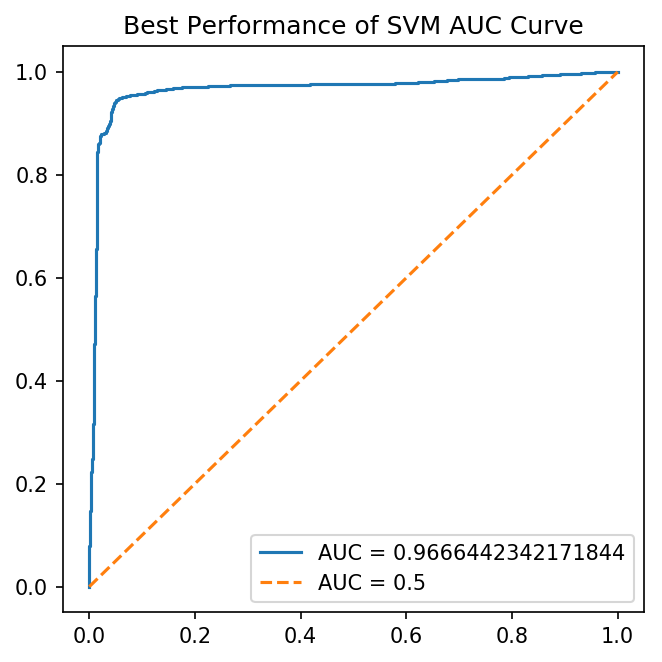

In [318]:
from sklearn.svm import SVC

clf = SVC(C=0.5, kernel="rbf", degree=3, probability=True)

model = clf.fit(X_train, y_train) 

y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])


print("Model Accuracy Out of Sample = %s"%accuracy_score(y_test, y_pred))

plt.figure(figsize=[5,5],dpi = 150)

plt.title("Best Performance of SVM AUC Curve")

plt.plot(fpr,tpr, label = "AUC = %s"%auc(fpr, tpr))

plt.plot([0,1],[0,1],'--', label = "AUC = 0.5")

plt.legend()
plt.show()

Model Accuracy Out of Sample = 0.9362068965517242


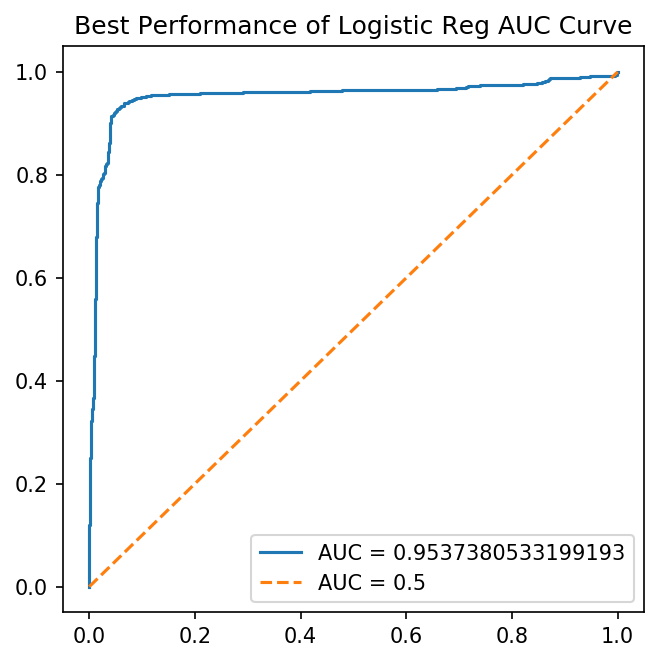

In [314]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty="l2", C=0.1)

model = clf.fit(X_train, y_train) 

y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])


print("Model Accuracy Out of Sample = %s"%accuracy_score(y_test, y_pred))

plt.figure(figsize=[5,5],dpi = 150)

plt.title("Best Performance of Logistic Reg AUC Curve")

plt.plot(fpr,tpr, label = "AUC = %s"%auc(fpr, tpr))

plt.plot([0,1],[0,1],'--', label = "AUC = 0.5")

plt.legend()
plt.show()

Model Accuracy Out of Sample = 0.9760536398467433


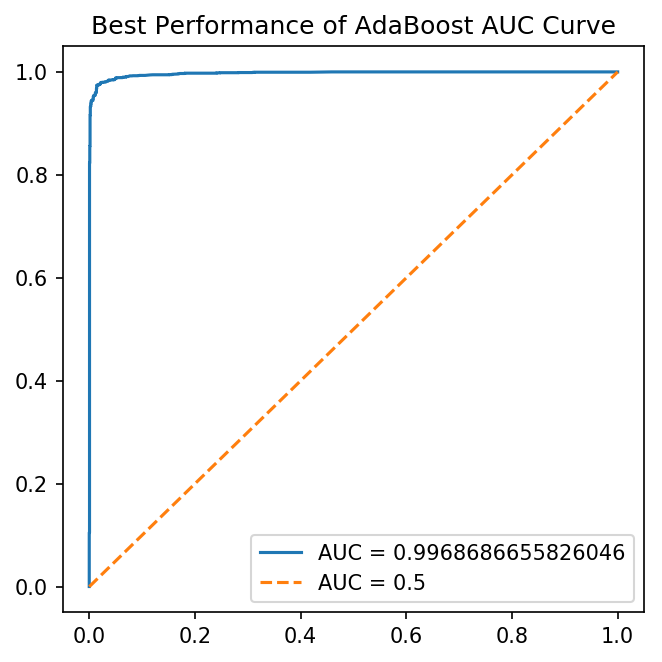

In [315]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)

model = clf.fit(X_train, y_train) 

y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])


print("Model Accuracy Out of Sample = %s"%accuracy_score(y_test, y_pred))

plt.figure(figsize=[5,5],dpi = 150)

plt.title("Best Performance of AdaBoost AUC Curve")

plt.plot(fpr,tpr, label = "AUC = %s"%auc(fpr, tpr))

plt.plot([0,1],[0,1],'--', label = "AUC = 0.5")

plt.legend()
plt.show()

In [316]:
import pickle


In [319]:
filename = '/Users/anjian/Dropbox (MIT)/Courses/Spring 2018/6.835 Intell Multi Modal UI/main project/version 2/ML_model/gesture_ml_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [193]:
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)


In [194]:
accuracy_score(y_test, y_pred)

0.9985899605188945

# Simulate JS data

In [222]:
js_data = '677.46432,457.23000000000013,-54.2322,487.5798,441.7464,-93.31667999999999,554.5668,247.76760000000002,-253.94327999999996,640.0218,224.26680000000022,-290.75219999999996,729.66504,259.3524,-288.74087999999995,629.921064,597.0792,83.81771999999998,589.538352,387.9660000000001,-87.02712,660.95796,389.0279999999999,-101.17872,732.84816,410.06640000000004,-104.4792,536.71476,502.3344000000001,-12.688056,567.882156,295.5,-191.73924,649.2108,282.59039999999993,-218.16684,732.27828,314.73839999999996,-216.39312,629.921064,597.0792,83.81771999999998,666.47964,528.9528000000001,94.08744,704.145,522.1164,80.81748,741.5129999999999,525.8028000000002,65.84796'
js_data = js_data.split(",")
js_data = np.array(js_data).astype(float)

js_df = pd.DataFrame([js_data], columns=x_features)

dist_features_names = []
dist_features = []
for i in range(3, len(x_features)-3, 3):
    types = x_features[i:i+3]
    name = types[0].split("-")[0]+"_"+types[0].split("-")[2]
    dist_features_names += [name]
    
    dist_features+= [calculate_dist(js_df,['wrist-x', 'wrist-y', 'wrist-z'], types)]
    
dist_features = np.array(dist_features).T


X_js = pd.DataFrame(dist_features, columns=dist_features_names)
X_js = pd.DataFrame(X_js.as_matrix()/(X_js['index_dip'].as_matrix().reshape(len(X_js),1)),columns=dist_features_names)
X_js = X_js.drop("index_dip",axis=1)

y_pred = loaded_model.predict(X_js)

In [232]:
y_pred[0]

0